In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
from google.colab.patches import cv2_imshow

In [4]:
!pip install opencv_contrib_python
import cv2

In [5]:

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [6]:
data = '/content/drive/MyDrive/python/ORL/ORL/s'


In [7]:
images = []
label = []
for i in range(1,41):
  path = data + str(i) + '/'
  for j in range(1,11):
    filename = str(j) + '.pgm'
    loc = path + filename
    img = cv2.imread(loc, -1) # read image
    #img = cv2.resize(img, (92, 112), interpolation = cv2.INTER_AREA) 
    label.append(i)
    images.append(img)

    

In [8]:
data_matrix = []
for img in images:
  img = img.flatten()
  data_matrix.append(img)

In [9]:
train_data = []
train_label = []
for i in range(1, 400, 2):
  train_data.append(data_matrix[i])
  train_label.append(label[i])

In [10]:
test_data = []
test_label = []
for i in range(0, 400, 2):
  test_data.append(data_matrix[i])
  test_label.append(label[i])

In [11]:
def show_image(x, y):
  img = np.resize(x, (112,92))
  cv2_imshow(img)
  print(y)

def show_on_scale(x, y):
  v = x.reshape(112,92)
  plt.imshow(np.asarray(v.squeeze()), cmap='gray')
  plt.show()
  print(y)


In [12]:
train_mean = np.mean([train_data], axis=1)
stand = train_data - train_mean

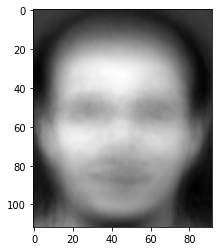

mean


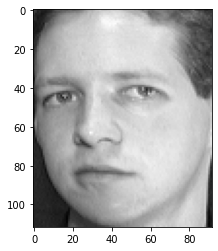

1


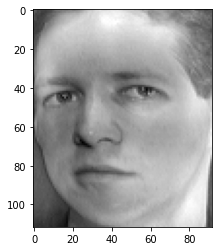

1


In [13]:
show_on_scale(train_mean, 'mean')
show_on_scale(train_data[1], train_label[1])
show_on_scale(stand[1], train_label[1])

In [14]:
covariance = (1/200) * np.dot(np.transpose(stand), stand)
eigenvalues, eigenvectors = np.linalg.eigh(covariance)

In [15]:
sorted_list = np.argsort(eigenvalues)
sorted_list = np.flip(sorted_list)

In [16]:
temp = np.transpose(eigenvectors)
eigvec = []
for i in sorted_list:
  eigvec.append(temp[i])
eigvec = np.transpose(eigvec)

In [17]:
eigenvectors = eigvec

In [18]:
eigenvalues = np.sort(eigenvalues)
eigenvalues = np.flip(eigenvalues) 

In [19]:
explained_variance = eigenvalues[0] / np.sum(eigenvalues)
print("Explained Variance =", (explained_variance * 100).round(2), "%")

Explained Variance = 17.35 %


In [20]:
projected_data = np.dot(train_data, eigenvectors)

In [21]:
def fraction_variance(x, eigenvalues):
  sum = 0
  for i in range(x):
    sum = sum + eigenvalues[i]
  variance = sum / np.sum(eigenvalues)
  return variance

def get_min_r(x, eigenvalues):
  for i in range(10304):
    v = fraction_variance(i, eigenvalues)
    if v >= x:
      return i


In [22]:
def reduce_matrix(x, matrix):
  P = np.transpose(matrix)
  P = P[:][0:x]
  P = np.transpose(P)
  return P

In [23]:
def project_data(x, eigenvalues, eigenvectors, x_train, x_test):
  r = get_min_r(x, eigenvalues)
  print("r = ", r)
  U = reduce_matrix(r, eigenvectors)
  projected_training = np.dot(x_train, U)
  projected_testing = np.dot(x_test, U)
  return projected_training, projected_testing


In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [25]:
accuracy = []
accuracy_K = []

In [26]:
model = KNeighborsClassifier(n_neighbors=1)
projected_training, projected_testing = project_data(0.8, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
accuracy.append(accuracy_score(test_label, test_pred))
accuracy_K.append(accuracy_score(test_label, test_pred))

r =  37
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       

In [27]:
projected_training, projected_testing = project_data(0.85, eigenvalues, eigenvectors , train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
accuracy.append(accuracy_score(test_label, test_pred))

r =  53
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       

In [28]:
projected_training, projected_testing = project_data(0.9, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
accuracy.append(accuracy_score(test_label, test_pred))

r =  77
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       

In [29]:
projected_training, projected_testing = project_data(0.95, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
accuracy.append(accuracy_score(test_label, test_pred))

r =  116
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18      

In [30]:
model = KNeighborsClassifier(n_neighbors=3)
projected_training, projected_testing = project_data(0.80, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
accuracy_K.append(accuracy_score(test_label, test_pred))
projected_training, projected_testing = project_data(0.85, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
projected_training, projected_testing = project_data(0.9, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
projected_training, projected_testing = project_data(0.95, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))


r =  37
              precision    recall  f1-score   support

           1       0.60      0.60      0.60         5
           2       0.71      1.00      0.83         5
           3       0.57      0.80      0.67         5
           4       1.00      1.00      1.00         5
           5       0.50      1.00      0.67         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.80      0.80      0.80         5
          17       1.00      0.60      0.75         5
          18       

In [31]:
model = KNeighborsClassifier(n_neighbors=5)
projected_training, projected_testing = project_data(0.80, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
accuracy_K.append(accuracy_score(test_label, test_pred))
projected_training, projected_testing = project_data(0.85, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
projected_training, projected_testing = project_data(0.9, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
projected_training, projected_testing = project_data(0.95, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))

r =  37
              precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       0.71      1.00      0.83         5
           3       0.80      0.80      0.80         5
           4       0.56      1.00      0.71         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       0.83      1.00      0.91         5
          13       0.83      1.00      0.91         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       0.83      1.00      0.91         5
          17       1.00      0.40      0.57         5
          18       

In [32]:
model = KNeighborsClassifier(n_neighbors=7)
projected_training, projected_testing = project_data(0.80, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
accuracy_K.append(accuracy_score(test_label, test_pred))
projected_training, projected_testing = project_data(0.85, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
projected_training, projected_testing = project_data(0.9, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))
projected_training, projected_testing = project_data(0.95, eigenvalues, eigenvectors, train_data, test_data)
model.fit(projected_training, train_label)
test_pred = model.predict(projected_testing)
print(classification_report(test_label, test_pred))

r =  37
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.50      1.00      0.67         5
           3       1.00      1.00      1.00         5
           4       0.56      1.00      0.71         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.71      1.00      0.83         5
          14       0.83      1.00      0.91         5
          15       0.67      0.80      0.73         5
          16       1.00      1.00      1.00         5
          17       1.00      0.40      0.57         5
          18       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       0.42      1.00      0.59         5
           3       1.00      1.00      1.00         5
           4       0.71      1.00      0.83         5
           5       0.50      1.00      0.67         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.62      1.00      0.77         5
          14       0.83      1.00      0.91         5
          15       0.50      0.40      0.44         5
          16       0.83      1.00      0.91         5
          17       0.75      0.60      0.67         5
          18       0.67    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print(accuracy)
print(accuracy_K)

[0.93, 0.94, 0.945, 0.935]
[0.93, 0.855, 0.805, 0.78]


In [34]:
k_values = [1,3,5,7]
a_values = [0.8, 0.85, 0.9, 0.95]

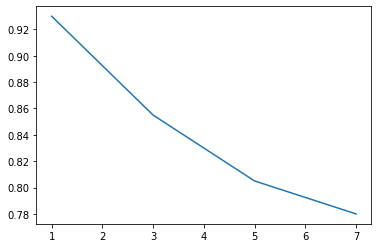

In [35]:
plt.plot(k_values, accuracy_K)

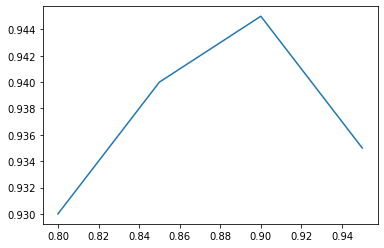

In [36]:
plt.plot(a_values, accuracy)

In [37]:
from sklearn.model_selection import train_test_split
bonus_train = []
bonus_train_label = []
bonus_test_label = []
bonus_test = []
bonus_train, bonus_test, bonus_train_label, bonus_test_label = train_test_split(data_matrix, label, test_size=0.3, stratify = label)

In [38]:
bonus_mean = np.mean([bonus_train], axis = 1)
bonus_stand = bonus_train - bonus_mean
cov = (1/280) * np.dot(np.transpose(bonus_stand), bonus_stand)
eigenvals, eigenvecs = np.linalg.eigh(cov)

In [39]:
sorted_list = np.argsort(eigenvals)
sorted_list = np.flip(sorted_list)
temp = np.transpose(eigenvecs)
eigvec = []
for i in sorted_list:
  eigvec.append(temp[i])
eigvec = np.transpose(eigvec)
eigenvecs = eigvec

In [40]:
eigenvals = np.sort(eigenvals)
eigenvals = np.flip(eigenvals) 

In [41]:
new_model = KNeighborsClassifier(n_neighbors=1)
bonus_accuracy = []
bonus_accuracy_K = []
projected_training, projected_testing = project_data(0.80, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
bonus_accuracy.append(accuracy_score(bonus_test_label, test_pred))
bonus_accuracy_K.append(accuracy_score(bonus_test_label, test_pred))

r =  40
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       

In [42]:
projected_training, projected_testing = project_data(0.85, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
bonus_accuracy.append(accuracy_score(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.90, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
bonus_accuracy.append(accuracy_score(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.95, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
bonus_accuracy.append(accuracy_score(bonus_test_label, test_pred))

r =  59
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       

In [43]:
new_model = KNeighborsClassifier(n_neighbors=3)
projected_training, projected_testing = project_data(0.8, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
bonus_accuracy_K.append(accuracy_score(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.85, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.90, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.95, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))

r =  40
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.60      1.00      0.75         3
          16       1.00      0.67      0.80         3
          17       0.75      1.00      0.86         3
          18       

In [44]:
new_model = KNeighborsClassifier(n_neighbors=5)
projected_training, projected_testing = project_data(0.8, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
bonus_accuracy_K.append(accuracy_score(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.85, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.90, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.95, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))

r =  40
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.60      1.00      0.75         3
          16       1.00      0.67      0.80         3
          17       0.75      1.00      0.86         3
          18       

In [45]:
new_model = KNeighborsClassifier(n_neighbors=7)
projected_training, projected_testing = project_data(0.8, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
bonus_accuracy_K.append(accuracy_score(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.85, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.90, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))
projected_training, projected_testing = project_data(0.95, eigenvals, eigenvecs, bonus_train, bonus_test)
new_model.fit(projected_training, bonus_train_label)
test_pred = new_model.predict(projected_testing)
print(classification_report(bonus_test_label, test_pred))

r =  40
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       0.60      1.00      0.75         3
          16       1.00      0.67      0.80         3
          17       1.00      0.67      0.80         3
          18       

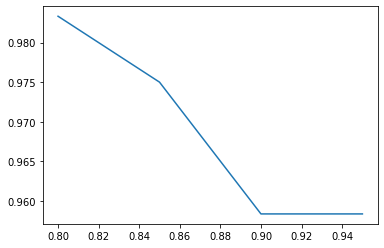

In [46]:
plt.plot(a_values, bonus_accuracy)

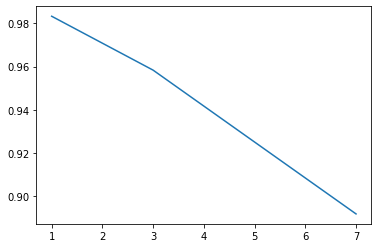

In [47]:
plt.plot(k_values, bonus_accuracy_K)

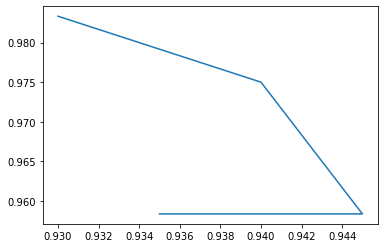

In [48]:
plt.plot(accuracy, bonus_accuracy)

In [49]:
print(bonus_accuracy)
print(accuracy)

[0.9833333333333333, 0.975, 0.9583333333333334, 0.9583333333333334]
[0.93, 0.94, 0.945, 0.935]
